In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


$$
    H = -J\sum_{\left\langle i,j \right\rangle}\sigma_i\sigma_j
$$

In [2]:
# parameters
np.random.seed(0)

J = 1.0
beta_C = 1 / 2 / J * np.log(1 + np.sqrt(2))
beta = 1.5 * beta_C

L = 81
iteration = 10000000
space = iteration // 10

block_size = 3;

In [3]:
#initial spin configuration
S_conf = (np.random.rand(L,L) > 0.5)
S_conf = S_conf.astype(np.int)
S_conf = 1 - 2 * S_conf

In [4]:
def H_local(S_conf,ix,iy):
    H = -J * (S_conf[ix,iy] * S_conf[(ix+1)%L,iy] + S_conf[ix,iy] * S_conf[(ix-1)%L,iy]\
             + S_conf[ix,iy] * S_conf[ix,(iy+1)%L] + S_conf[ix,iy] * S_conf[ix,(iy-1)%L])
    return H

In [5]:
def heatbath(S_conf,ix,iy):
    S_conf_up = S_conf.copy()
    S_conf_up[ix,iy] = +1
    
    S_conf_dn = S_conf.copy()
    S_conf_dn[ix,iy] = -1
    
    if np.random.rand() < 1 / (1 + np.exp(beta * (H_local(S_conf_up,ix,iy) - H_local(S_conf_dn,ix,iy)))):
        S_conf[ix,iy] = +1
    else:
        S_conf[ix,iy] = -1
        
            
    

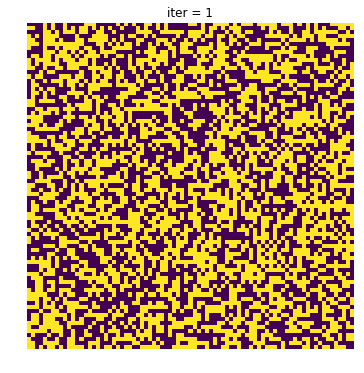

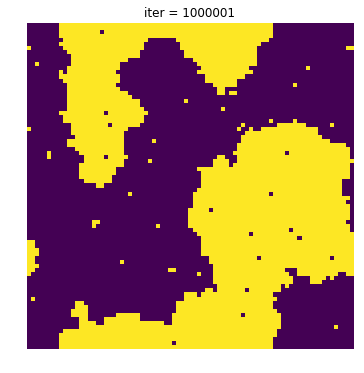

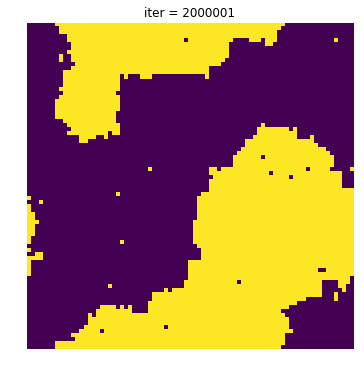

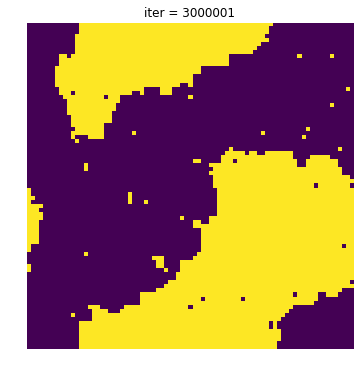

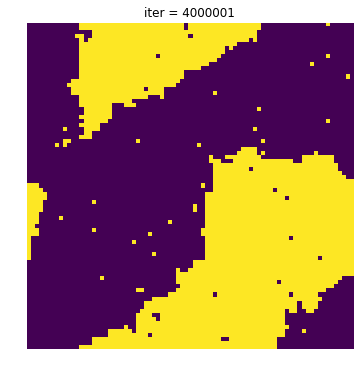

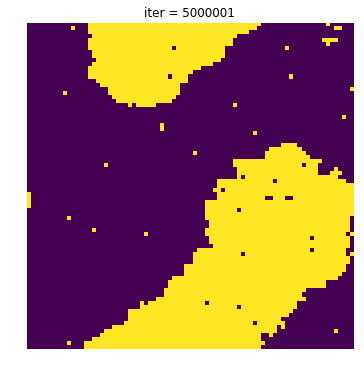

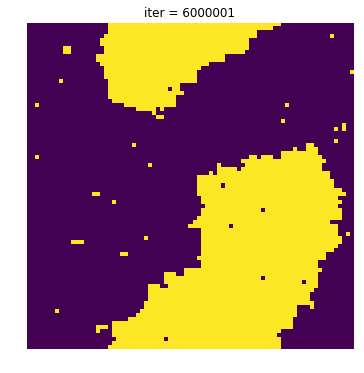

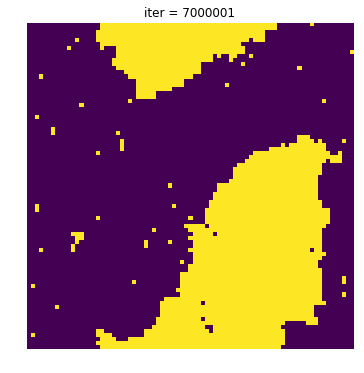

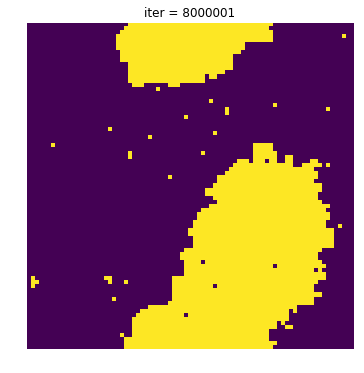

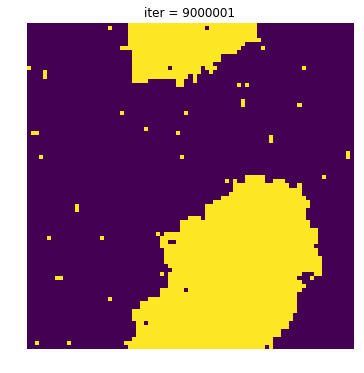

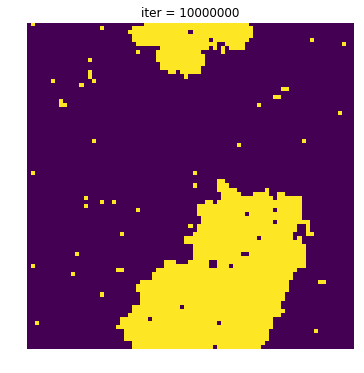

In [6]:
for l in range(iteration):
    if l%space == 0:
        fig = plt.figure(figsize=(8,6))
        plt.imshow(S_conf,vmin=-1,vmax=1)
        plt.title("iter = " + str(l+1))
        plt.axis("off")
        plt.show()
    ix = np.random.randint(0,L)
    iy = np.random.randint(0,L)
    heatbath(S_conf,ix,iy)

fig = plt.figure(figsize=(8,6))
plt.imshow(S_conf,vmin=-1,vmax=1)
plt.title("iter = " + str(l+1))
plt.axis("off")
plt.show()

ブロックスピン変換


In [7]:
def block_spin_tr(S_conf,block_size=3):
    L_tr = (np.array(S_conf.shape)//block_size)[0]
    S_conf_tr = np.zeros((L_tr,L_tr))
    for ix in range(L_tr):
        for iy in range(L_tr):
            block_sum = np.sum(S_conf[ix*3:ix*3+3,iy*3:iy*3+3])
            if block_sum > 0:
                S_conf_tr[ix,iy] = +1
            elif block_sum < 0:
                S_conf_tr[ix,iy] = -1
            elif block_sum == 0:
                S_conf_tr[ix,iy] = 1 - 2 * np.random.randint(0,2)
    return S_conf_tr
                
    
    

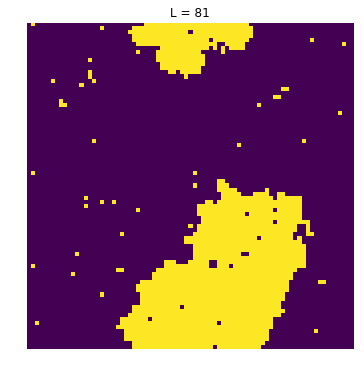

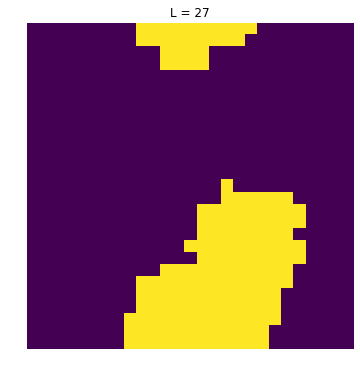

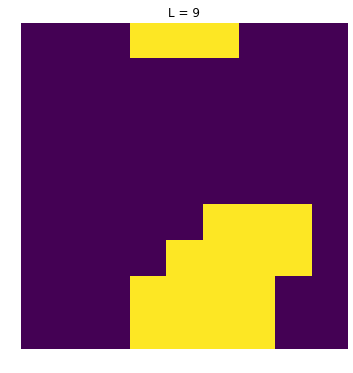

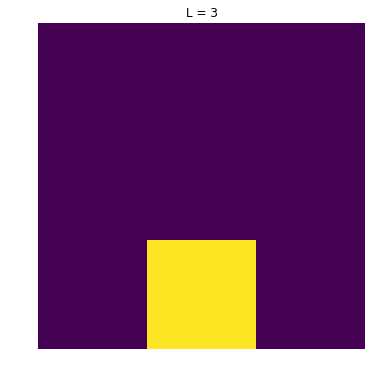

In [8]:
S_conf_tr = S_conf.copy()
fig = plt.figure(figsize=(8,6))
plt.imshow(S_conf_tr,vmin=-1,vmax=1)
plt.title("L = " + str((np.array(S_conf_tr.shape))[0]))
plt.axis("off")
plt.show()
for l in range(3):
    S_conf_tr = block_spin_tr(S_conf_tr,block_size=3)
    fig = plt.figure(figsize=(8,6))
    plt.imshow(S_conf_tr,vmin=-1,vmax=1)
    plt.title("L = " + str((np.array(S_conf_tr.shape))[0]))
    plt.axis("off")
    plt.show()